In [19]:
import pandas as pd
import numpy as np
import networkx as nx
from networkx.algorithms import community
%matplotlib inline

In [27]:
import json
from pprint import pprint

with open('data/dataset_20180403/180331_Herbert_Heim.json', encoding='utf-8') as data_file:
    data = json.load(data_file)
pprint(data)

{'actionSystems': [{'id': '77fa1ee6-8811-373d-703c-d86ecec96b1a',
                    'name': 'Heim'}],
 'connections': [['0', '++', '0', '0', '++', '0', '0', '0'],
                 ['0', '0', '--', '0', '+', '0', '0', '0'],
                 ['0', '0', '0', '--', '0', '0', '0', '0'],
                 ['0', '0', '0', '0', '0', '0', '0', '++'],
                 ['0', '0', '-', '0', '0', '0', '0', '0'],
                 ['0', '0', '0', '0', '0', '0', '--', '0'],
                 ['0', '0', '0', '0', '0', '0', '0', '++'],
                 ['0', '++', '0', '0', '0', '0', '0', '0']],
 'lifeEntries': [{'actionSystemId': '77fa1ee6-8811-373d-703c-d86ecec96b1a',
                  'id': '4d9c72ee-a9de-4ac3-6019-f20ac043554a',
                  'influence': -1,
                  'title': 'hyperaktiv, unkonzentriert'},
                 {'actionSystemId': '77fa1ee6-8811-373d-703c-d86ecec96b1a',
                  'id': '0922f384-a79f-4c69-ea26-dea557173f0d',
                  'influence': -1,
       

In [28]:
df = pd.DataFrame(data['connections'])
df = df.replace('0', 0)
df = df.replace('+', 1)
df = df.replace('++', 2)
df = df.replace('-', -1)
df = df.replace('--', -2)
am = np.array(df)
am.astype(int)
print(am)

[[ 0  2  0  0  2  0  0  0]
 [ 0  0 -2  0  1  0  0  0]
 [ 0  0  0 -2  0  0  0  0]
 [ 0  0  0  0  0  0  0  2]
 [ 0  0 -1  0  0  0  0  0]
 [ 0  0  0  0  0  0 -2  0]
 [ 0  0  0  0  0  0  0  2]
 [ 0  2  0  0  0  0  0  0]]


In [29]:
actionSystems = {}
for i, actionSystem in enumerate(data['actionSystems']):
    actionSystems[actionSystem['id']] = actionSystem['name']

In [30]:
names = {}
nodeActionSystems = {}
influence = {}
for i, lifeEntry in enumerate(data['lifeEntries']):
    names[i] = lifeEntry['title']
    nodeActionSystems[i] = actionSystems[lifeEntry['actionSystemId']]
    influence[i] = lifeEntry['influence']

In [45]:
temp = nx.MultiDiGraph()
G = nx.from_numpy_matrix(am, parallel_edges=False, create_using=temp)

In [46]:
nx.set_node_attributes(G, names, name='name')
nx.set_node_attributes(G, nodeActionSystems, name='actionSystem')
nx.set_node_attributes(G, influence, name='influence')

In [62]:
print('Weighted Degree:')
print(G.degree(weight='weight'))
print('Degree:')
print(G.degree())
print('Weighted In-Degree:')
print(G.in_degree(weight='weight'))
print('In-Degree:')
print(G.in_degree())
print('Weighted Out-Degree:')
print(G.out_degree(weight='weight'))
print('Out-Degree:')
print(G.out_degree(G))

Weighted Degree:
[(0, 4), (1, 3), (2, -5), (3, 0), (4, 2), (5, -2), (6, 0), (7, 6)]
Degree:
[(0, 2), (1, 4), (2, 3), (3, 2), (4, 3), (5, 1), (6, 2), (7, 3)]
Weighted In-Degree:
[(0, 0), (1, 4), (2, -3), (3, -2), (4, 3), (5, 0), (6, -2), (7, 4)]
In-Degree:
[(0, 0), (1, 2), (2, 2), (3, 1), (4, 2), (5, 0), (6, 1), (7, 2)]
Weighted Out-Degree:
[(0, 4), (1, -1), (2, -2), (3, 2), (4, -1), (5, -2), (6, 2), (7, 2)]
Out-Degree:
[(0, 2), (1, 2), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1)]


{(0, 1, 0): 2, (0, 4, 0): 2, (1, 2, 0): -2, (1, 4, 0): 1, (2, 3, 0): -2, (3, 7, 0): 2, (4, 2, 0): -1, (5, 6, 0): -2, (6, 7, 0): 2, (7, 1, 0): 2}


ValueError: too many values to unpack (expected 2)

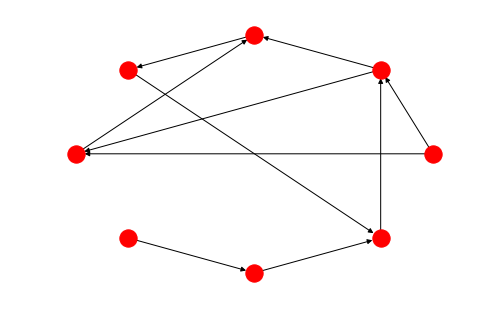

In [67]:
pos = nx.circular_layout(G)
nx.draw(G, pos, font_size=12, with_labels=False)
edgelabels = nx.get_edge_attributes(G, 'weight')
print(edgelabels)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edgelabels)
nx.draw_networkx_labels(G, pos, alpha=.8)